Real and Fake Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile('/content/drive/MyDrive/Ai Project.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Ai Project')

train_dir = '/content/Ai Project/train'
test_dir = '/content/Ai Project/test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='binary')

Found 479 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_generator, epochs=200, validation_data=test_generator)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6751 - loss: 0.6961 - val_accuracy: 0.2204 - val_loss: 1.0426
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6849 - loss: 0.6500 - val_accuracy: 0.2204 - val_loss: 0.8480
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6747 - loss: 0.6313 - val_accuracy: 0.2886 - val_loss: 1.0584
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6960 - loss: 0.5753 - val_accuracy: 0.5691 - val_loss: 0.6934
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6870 - loss: 0.6179 - val_accuracy: 0.3066 - val_loss: 0.7928
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7141 - loss: 0.6011 - val_accuracy: 0.6633 - val_loss: 0.6313
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6824 - loss: 0.6022 - val_accuracy: 0.2725 - val_loss: 0.9439
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7027 - loss: 0.5666 - val_accuracy: 0.4188 - val_loss: 0.8

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 661ms/step


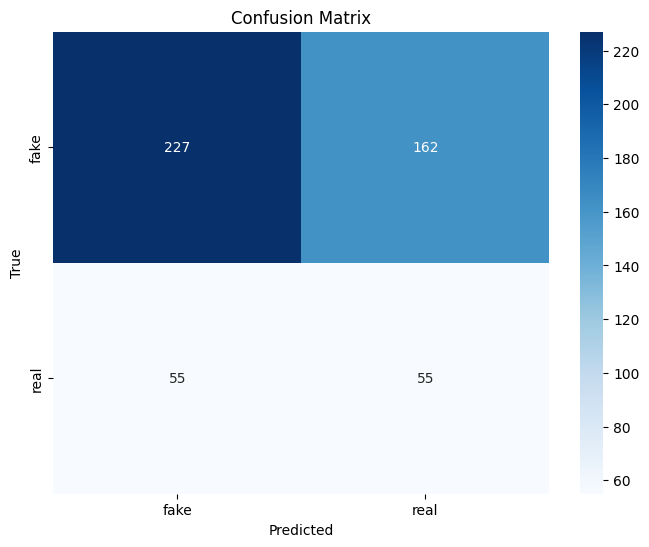

              precision    recall  f1-score   support

        fake       0.80      0.58      0.68       389
        real       0.25      0.50      0.34       110

    accuracy                           0.57       499
   macro avg       0.53      0.54      0.51       499
weighted avg       0.68      0.57      0.60       499



In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = [1 if pred > 0.5 else 0 for pred in predictions]
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

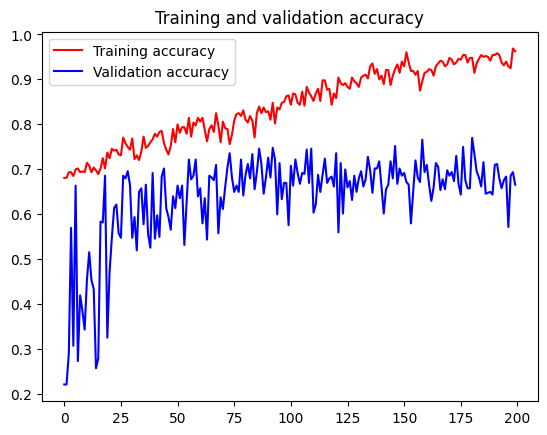

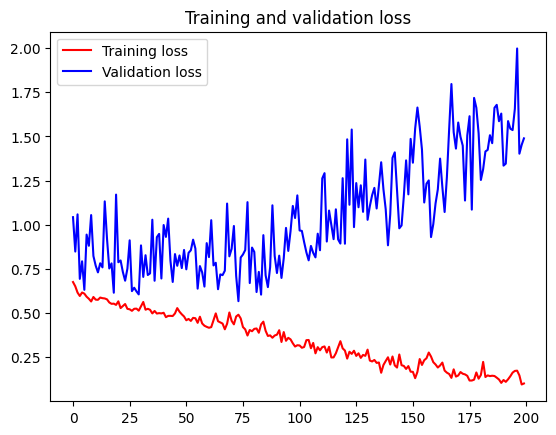

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


In [ ]:
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print(f"The image at {img_path} is predicted to be Fake with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"The image at {img_path} is predicted to be Real with a confidence of {1 - prediction[0][0]:.2f}")


In [ ]:
def display_prediction(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    predict_image(model, img_path)




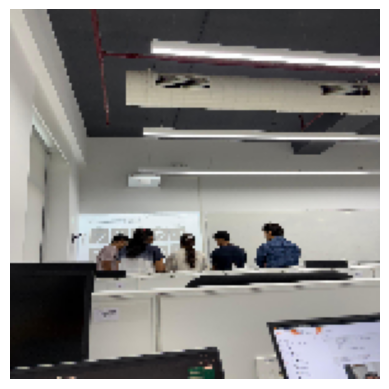

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
The image at /content/W.jpg is predicted to be Real with a confidence of 0.65


In [ ]:
img_path = '/content/W.jpg'  # Replace with your image path
display_prediction(img_path)